# Big Data Cup Event #3

In [1]:
import pandas as pd
import numpy as np
import re

# For visualizations
import matplotlib.pyplot as plt
from collections import Counter 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [3]:
import os
os.getcwd()

'C:\\Users\\rifai\\OneDrive\\Queens University\\MMA\\MMA 865\\Big Data Cup'

# Load Data

In [4]:
df = pd.read_csv("spamraw_train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   sms_text  5000 non-null   object
 2   spam      5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


,id,sms_text,spam
0,1,Hope you are having a good week. Just checking in,0
1,2,K..give back my thanks.,0
2,3,Am also doing in cbe only. But have to pay.,0
3,4,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",1
4,5,okmail: Dear Dave this is your final notice to...,1


In [5]:
np.bincount(df['spam'])

array([4327,  673], dtype=int64)

,sms_text,word_count
0,Hope you are having a good week. Just checking in,10
1,K..give back my thanks.,4
2,Am also doing in cbe only. But have to pay.,10
3,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",21
4,okmail: Dear Dave this is your final notice to...,27


(array([3.181e+03, 1.635e+03, 1.310e+02, 2.800e+01, 1.400e+01, 6.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([  1.,  18.,  35.,  52.,  69.,  86., 103., 120., 137., 154., 171.]),
 <BarContainer object of 10 artists>)

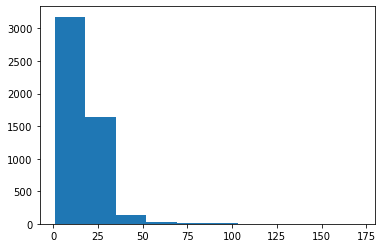

,sms_text,char_count
0,Hope you are having a good week. Just checking in,49
1,K..give back my thanks.,23
2,Am also doing in cbe only. But have to pay.,43
3,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,okmail: Dear Dave this is your final notice to...,161


(array([3.301e+03, 1.580e+03, 6.900e+01, 3.100e+01, 1.200e+01, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <BarContainer object of 10 artists>)

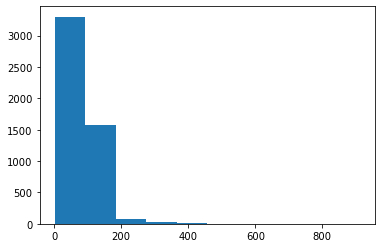

array(['Hope you are having a good week. Just checking in',
       'K..give back my thanks.',
       'Am also doing in cbe only. But have to pay.', ...,
       "If you're not in my car in an hour and a half I'm going crazy",
       'Mm umma ask vava also to come tell him can play later together',
       "There generally isn't one. It's an uncountable noun - u in the dictionary. pieces of research?"],
      dtype=object)

i      2414
to     2027
you    1762
a      1293
the    1206
is     1204
u      1069
and     872
in      791
my      683
dtype: int64

0    hope you are having a good week. just checking in
1                              k..give back my thanks.
2          am also doing in cbe only. but have to pay.
3    complimentary star ibiza holiday or £, cash ne...
4    okmail: dear dave this is your final notice to...
Name: sms_text, dtype: object

ducking      1
netflix      1
de.am        1
genus        1
delayed      1
            ..
you:-.       1
census.      1
texts!       1
drms.take    1
exhausted    1
Length: 100, dtype: int64

0    hope you are having a good week. just checking in
1                              k..give back my thanks.
2          am also doing in cbe only. but have to pay.
3    complimentary star ibiza holiday or £, cash ne...
4    okmail: dear dave this is your final notice to...
Name: sms_text, dtype: object

In [6]:
#Text Preprocessing

#Word Count of each review
df['word_count'] = df['sms_text'].apply(lambda x: len(str(x).split(" ")))
df[['sms_text','word_count']].head()
plt.hist(df['word_count'])
plt.show()

#Character Count of each review
df['char_count'] = df['sms_text'].str.len() ## this also includes spaces
df[['sms_text','char_count']].head()
plt.hist(df['char_count'])
plt.show()

# Remove ,,, from entries in name column
df['sms_text'] = df['sms_text'].str.replace(r'\,,,','')
df['sms_text'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['sms_text']=df['sms_text'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df['sms_text']=df['sms_text'].str.lower()

#Remove digits and words containing digits 
df['sms_text']=df['sms_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
#df['sms_text']=df['sms_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df['sms_text']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df['sms_text'] = df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms_text'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df['sms_text']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df['sms_text'] = df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms_text'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['sms_text.nostopwords'] = df['sms_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df['sms_text.nostopwords.LEMMATIZED'] = df['sms_text.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Sentiment Analysis 
from textblob import TextBlob
df['polarity']=df['sms_text.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)



In [7]:
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['sms_text']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df['reviewChars'] = count_characters(df)


In [8]:
def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['sms_text']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df['reviewPuncts'] = numpunct(df)

In [9]:
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df['ratiopunChar'] = ratio_puncts_chars(df)


In [10]:
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['sms_text']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df['reviewCwords'] = numcapwords(df)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=200, lowercase=True, stop_words = 'english', ngram_range=(1, 3), min_df = 0.01)
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df['sms_text.nostopwords.LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [12]:
df1=df[['word_count', 'char_count','spam','polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [13]:
df2.info()
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2["ratiopunChar"]=df2["ratiopunChar"].fillna(0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 109 entries, ask to reviewCwords
dtypes: float64(103), int64(6)
memory usage: 4.2 MB


In [14]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("label") was dropped since it will be predicted using the model.
X = df2.drop(["spam"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["spam"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["spam"].values)

In [15]:
#Downsampling 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42,replacement=False)
X_train=X_train.to_numpy()

X_train, y_train = rus.fit_resample(X_train, y_train)



In [16]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50000)

[[839  26]
 [  9 126]]


(839, 26, 9, 126)

<AxesSubplot:>


F1 Score = 0.96500
AUC Score = 0.952

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       865
           1       0.83      0.93      0.88       135

    accuracy                           0.96      1000
   macro avg       0.91      0.95      0.93      1000
weighted avg       0.97      0.96      0.97      1000



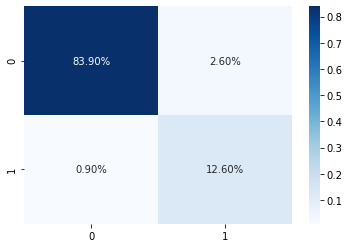

In [17]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score

# Predicting performance of hypertuned Logistic Regression model

pred_val = log_reg.predict(X_val)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_val, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

# Create Submission File on Kaggle Hold-Out Data

In [18]:
test_df = pd.read_csv('spamraw_test.csv')


,sms_text,word_count
0,HOT LIVE FANTASIES call now 08707509020 Just 2...,19
1,I not at home now lei...,6
2,So how's scotland. Hope you are not over showi...,17
3,Yo you around? A friend of mine's lookin to pi...,13
4,I'm aight. Wat's happening on your side.,7


(array([286., 161., 100.,   3.,   3.,   5.,   0.,   0.,   0.,   1.]),
 array([  1. ,  12.8,  24.6,  36.4,  48.2,  60. ,  71.8,  83.6,  95.4,
        107.2, 119. ]),
 <BarContainer object of 10 artists>)

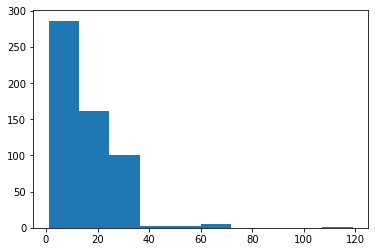

,sms_text,char_count
0,HOT LIVE FANTASIES call now 08707509020 Just 2...,101
1,I not at home now lei...,24
2,So how's scotland. Hope you are not over showi...,95
3,Yo you around? A friend of mine's lookin to pi...,65
4,I'm aight. Wat's happening on your side.,40


(array([284., 141., 120.,   4.,   3.,   4.,   1.,   1.,   0.,   1.]),
 array([  3. ,  60.1, 117.2, 174.3, 231.4, 288.5, 345.6, 402.7, 459.8,
        516.9, 574. ]),
 <BarContainer object of 10 artists>)

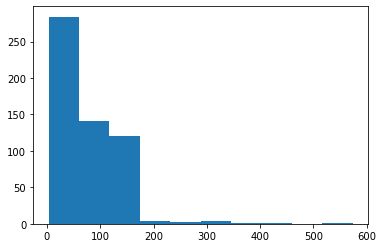

array(['HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870..k',
       'I not at home now lei...',
       "So how's scotland. Hope you are not over showing your JJC tendencies. Take care. Live the dream",
       "Yo you around? A friend of mine's lookin to pick up later tonight",
       "I'm aight. Wat's happening on your side.",
       'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV',
       "I'm taking derek & taylor to walmart, if I'm not back by the time you're done just leave the mouse on my desk and I'll text you when priscilla's ready",
       'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx',
       'Kallis is ready for bat in 2nd innings',
       "I'll get there at 3, unless you guys want me to come some time sooner",
       'Shall i come to get pickle',
       'Carry on not disturbing both of you',
       'Hi dis is yijue 

i      269
you    214
to     202
is     147
a      139
the    115
and     90
u       86
for     77
my      68
dtype: int64

0    hot live fantasies call now just per min ntt l...
1                             i not at home now lei...
2    so how is scotland. hope you are not over show...
3    yo you around? a friend of mine is lookin to p...
4           i am aight. wat is happening on your side.
Name: sms_text, dtype: object

considering    1
gym?           1
them.          1
/msg.          1
slightly       1
              ..
resend         1
fromm          1
tm             1
allow          1
click          1
Length: 100, dtype: int64

0    hot live fantasies call now just per min ntt l...
1                             i not at home now lei...
2    so how is scotland. hope you are not over show...
3    yo you around? a friend of mine is lookin to p...
4           i am aight. wat is happening on your side.
Name: sms_text, dtype: object

In [19]:
# Process Data 
#Text Preprocessing

#Word Count of each review
test_df['word_count'] = test_df['sms_text'].apply(lambda x: len(str(x).split(" ")))
test_df[['sms_text','word_count']].head()
plt.hist(test_df['word_count'])
plt.show()

#Character Count of each review
test_df['char_count'] = test_df['sms_text'].str.len() ## this also includes spaces
test_df[['sms_text','char_count']].head()
plt.hist(test_df['char_count'])
plt.show()

# Remove ,,, from entries in name column
test_df['sms_text'] = test_df['sms_text'].str.replace(r'\,,,','')
test_df['sms_text'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['sms_text']=test_df['sms_text'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['sms_text']=test_df['sms_text'].str.lower()

#Remove digits and words containing digits 
test_df['sms_text']=test_df['sms_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
#test_df['sms_text']=test_df['sms_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['sms_text']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
test_df['sms_text'] = test_df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['sms_text'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(test_df['sms_text']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
test_df['sms_text'] = test_df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['sms_text'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
test_df['sms_text.nostopwords'] = test_df['sms_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
test_df['sms_text.nostopwords.LEMMATIZED'] = test_df['sms_text.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity']=test_df['sms_text.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [20]:
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['sms_text']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
test_df['reviewChars'] = count_characters(test_df)


In [21]:
def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['sms_text']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
test_df['reviewPuncts'] = numpunct(test_df)

In [22]:
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)


In [23]:
test_df['reviewCwords'] = numcapwords(test_df)

In [24]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(test_df['sms_text.nostopwords.LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())

In [25]:
#Choose Features and combine word features with other features 
df4=test_df[['word_count', 'char_count','polarity','reviewChars','id','reviewPuncts','ratiopunChar','reviewCwords']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)

In [26]:
# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = df5.drop(['id'], axis=1)

# Use your model to make predictions
pred_test = log_reg.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'id': df5.id, 'predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/rifai\OneDrive/Queens University/MMA/MMA 865/try3', index=False)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 

,id,prediction
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0
